In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [2]:
df = pd.read_csv('C:/Users/vedaa/Machine Learning Python/Project/Covid-19 Sentiment Analysis/file1.csv')

In [3]:
df.drop(['Date_of_tweet', 'Country_code', 'Username', 'TweetID', 'Text_length', 'polarity'], inplace = True, axis = 1)
df.head()

,Text,sentiment
0,"#RepublicDay parade to be shorter, with fewer ...",0
1,Researchers at the University of Miami have re...,1
2,"The organization called 'Bavar,' or 'Belief' i...",1
3,"सुपरजंबो विमानों पर पड़ी कोरोना वायरस की मार, ...",1
4,Can anybody explain Why now travellers from UK...,2


In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.25, random_state = 0)

In [6]:
train_df = pd.DataFrame({
    'text': train['Text'][:30000].replace(r'\n', ' ', regex=True),
    'label': train['sentiment'][:30000]
})

eval_df = pd.DataFrame({
    'text': test['Text'][-2000:].replace(r'\n', ' ', regex=True),
    'label': test['sentiment'][-2000:]
})

In [7]:
from simpletransformers.classification import ClassificationModel


# Create a TransformerModel
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=False)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [9]:
model.train_model(train_df)

(3750, 0.36092604619991037)

In [10]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

C:\Users\vedaa\anaconda3\lib\site-packages\simpletransformers\classification\classification_model.py:1383: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


In [11]:
result

{'mcc': 0.9134011106141188, 'eval_loss': 0.19033285456104204}

In [12]:
model_outputs

array([[-0.13696012, -2.16255021,  3.30527401],
       [-2.74522686,  4.77725744, -2.58975267],
       [-2.72685432,  4.76302242, -2.58180547],
       ...,
       [-2.69269991,  4.62709236, -2.48645973],
       [ 2.98299217, -1.92063296, -0.85077524],
       [ 3.37502241, -1.98284602, -1.14049411]])

In [13]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))
true = eval_df['label'].tolist()
predicted = lst

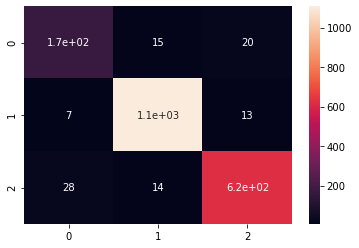

In [14]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
df_cm = pd.DataFrame(mat, range(3), range(3))

sns.heatmap(df_cm, annot=True) 
plt.show()

In [15]:
print(sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative']))

              precision    recall  f1-score   support

    positive       0.83      0.83      0.83       207
     neutral       0.97      0.98      0.98      1127
    negative       0.95      0.94      0.94       666

    accuracy                           0.95      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.95      0.95      0.95      2000



In [16]:
sklearn.metrics.accuracy_score(true,predicted)

0.9515

In [50]:
import seaborn as sns
import plotly.express as px

In [38]:
data = pd.DataFrame({'Model': ['BERT', 'Random Forest', 'Logistic Regression', 'Naive Bayes'], 'Accuarcy': [95, 91, 90, 70]})